# High Dimensional Data Analysis Day 1

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "black",
        "transition": None,
        "start_slideshow_at": "selected",
        "enable_chalkboard": True,
        "chalkboard": {
            "color": ["rgb(225, 193, 7)", "rgb(30, 136, 229)"]
        },
     }
)

{'theme': 'black',
 'start_slideshow_at': 'selected',
 'enable_chalkboard': True,
 'chalkboard': {'color': ['rgb(225, 193, 7)', 'rgb(30, 136, 229)']}}

In [36]:
# limit # of obs.
overall_n = 500  # max

#kfold splits
n_splits = 2

# try onehot encoding nom vars (see Chris's helper function)
# comparison with less and more data.

Motivate this. Context for disucssion high dim analysis.

# Predict if house sales price will be high for market from house characteristics

## Ames housing dataset data


## load dataset

In [37]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

## view data

In [38]:
df = housing.data
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
# df = df[:overall_n]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
2,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
3,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
4,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
5,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1457,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1458,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal


## all feature names

In [39]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

# How do I find out what these features mean? Data Dictionary

In [40]:
from IPython.display import display, Pretty

# the housing object contains a Data Dictionary for the DataFrame
text = Pretty(housing.DESCR)
display(text)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

##EXERCISE_START:What does TotRmsAbvGrd refer to?
##EXERCISE_SOLUTION
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##EXERCISE_END

##EXERCISE_START:How many variables are numeric?
##EXERCISE_SOLUTION
36 numeric (are these all continuous?)
43 text_based (are these all categorical?)
##EXERCISE_END

##EXERCISE_START:How many Nan entries are there per variable?
##EXERCISE_SOLUTION
# df.isna().sum()
##EXERCISE_END


##EXERCISE_START:Which of these variables would be the best predictor of house sale price? Why?
##EXERCISE_SOLUTION
Possible answers: SquareFt, OverallQual, YearBuilt
##EXERCISE_END


# Target Feature: SalePrice

In [41]:
# add target variable 'sales price' to data df from housing object
# initial stats - some take aways.
df[housing.target_names[0]] = housing.target.tolist()[:overall_n] 
df.describe()

ValueError: Length of values (500) does not match length of index (1460)

## what does SalePrice look like?

In [42]:
import helper_functions
helper_functions.plot_salesprice(
    df,
    #ylog=True
)

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

Is this a normal distribution? Will that distribution influcence modelling this value? How?

# Feature Selection

In [43]:
# Original DataFrame dimensions (+ SalesPrice)
print(f"{df.shape=}")

df.shape=(1460, 79)


In [44]:
# for simplicity at this piont - let's only use numerical columns
# only numerical column descriptions
df.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [45]:
# capture non_numerical columns
num_cols = df.describe().columns.tolist()

In [46]:
# numerical column only dataframe
df[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1457,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1458,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0


# EXERCISE_START: Modelling Dataset Description
1. how many observations are there in our dataset?
2. how many features are there in the whole dataset?
3. how many **numerical** features are there in the whole dataset?
# EXERCISE_SOLUTION
1. 1460 observations (len(df))
2. 79 features total (len(df.columns.tolist())) - 1 (can't use SalesPrice)
3. 36 numerical features (len(df[num_cols].columns.tolist()) - 1 (can't use SalesPrice)
# EXERCISE_END


# EXERCISE_START:Modelling Feature Selection
1. Can all of those features be used in a model?
2. Would you want to use all of those features?
# EXERCISE_SOLUTION
1. yes all the features could be used. With possible implications for the quality of the model.
3. features that are not (anti)correlated with the target variable may not add any useful information to the model
3. features that are correlated with other features may not add a lot more information and may produce a poorer quality model.

# EXERCISE_END

# EXERCISE_START:Model Feature Count
2. how many features should be used total?
# EXERCISE_SOLUTION
### A possible approach:
0. n = number of observations
1. uncorrelated features count = (n - 1)
2. as correlation increases, feature count proportional to sqrt(n)
    1. assuming some correlation: sqrt(1460) = 38.21
per: [Optimal number of features as a function of sample size for various classification rules](https://academic.oup.com/bioinformatics/article/21/8/1509/249540)

### Data analysis and modeling can be very emprical 
You need to try things out to see what works. If your features are indepent and identically distributed, or not, will impact how many observations are required

### Generally for a classifcation model
1. Distribution of features per target class matters a ton
2. More observations mean you can use more features
# EXERCISE_END


# EXERCISE_START:Overfitting
What is model overfitting? how does a model become overfit?

# EXERCISE_SOLUTION
your model is unabel to generalize - it has 'memorized' the data, rather than the patterns in it.

TODO: ADD IN HERE.

# EXERCISE_END


# EXERCISE_START:Model Feature Quality
4. which features should be used to predict the target variable? (which variables are good predictors?)
# EXERCISE_SOLUTION
Many possible answers here, some general ideas
1. those that are most correlated with the target variable
2. those that are not correlated with each other
# EXERCISE_END

# Build classifier model to predict high sales price (top 10 %) or not

## create top_10 and not_10 classes in data

In [47]:
split_df = helper_functions.split_df(
    df, 
    split_col='SalePrice', 
    top_split=10
)

# define a hue column to help plot color
split_df['hue'] = [1 if x else 0 for x in split_df['top_10']]


KeyError: 'SalePrice'

In [48]:
# show top_10 and not top_10 rows in df
import pandas as pd
pd.concat([
    split_df[df['top_10']].head(10),
    split_df[~df['top_10']].head(10)
])

KeyError: 'top_10'

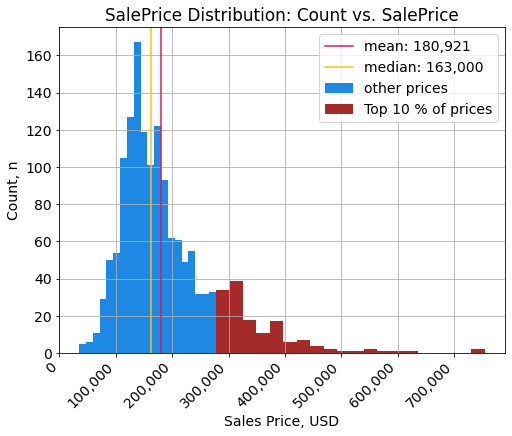

In [49]:
helper_functions.plot_salesprice(
    split_df,
)

# Plot correlations and histograms of those columns

Reminder:
1. What features should go in a model to predict high house price?
2. What features are correlated with high house price?

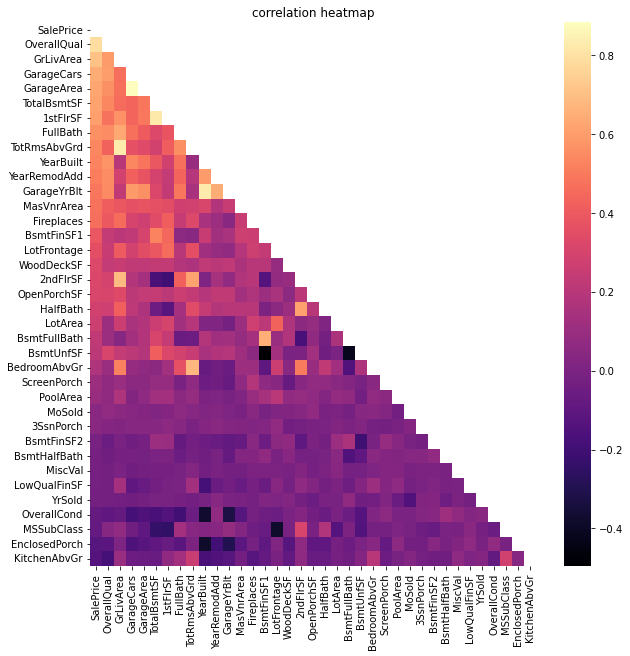

In [50]:
corr_mat=helper_functions.plot_corr_matrix(split_df)


## check top 5 highest correlation values

In [51]:
corr_cols = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)[1:6]
    .index
    .tolist()
)
corr_cols


['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# Create Pairplots of the top five most correlated values

In [52]:
split_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

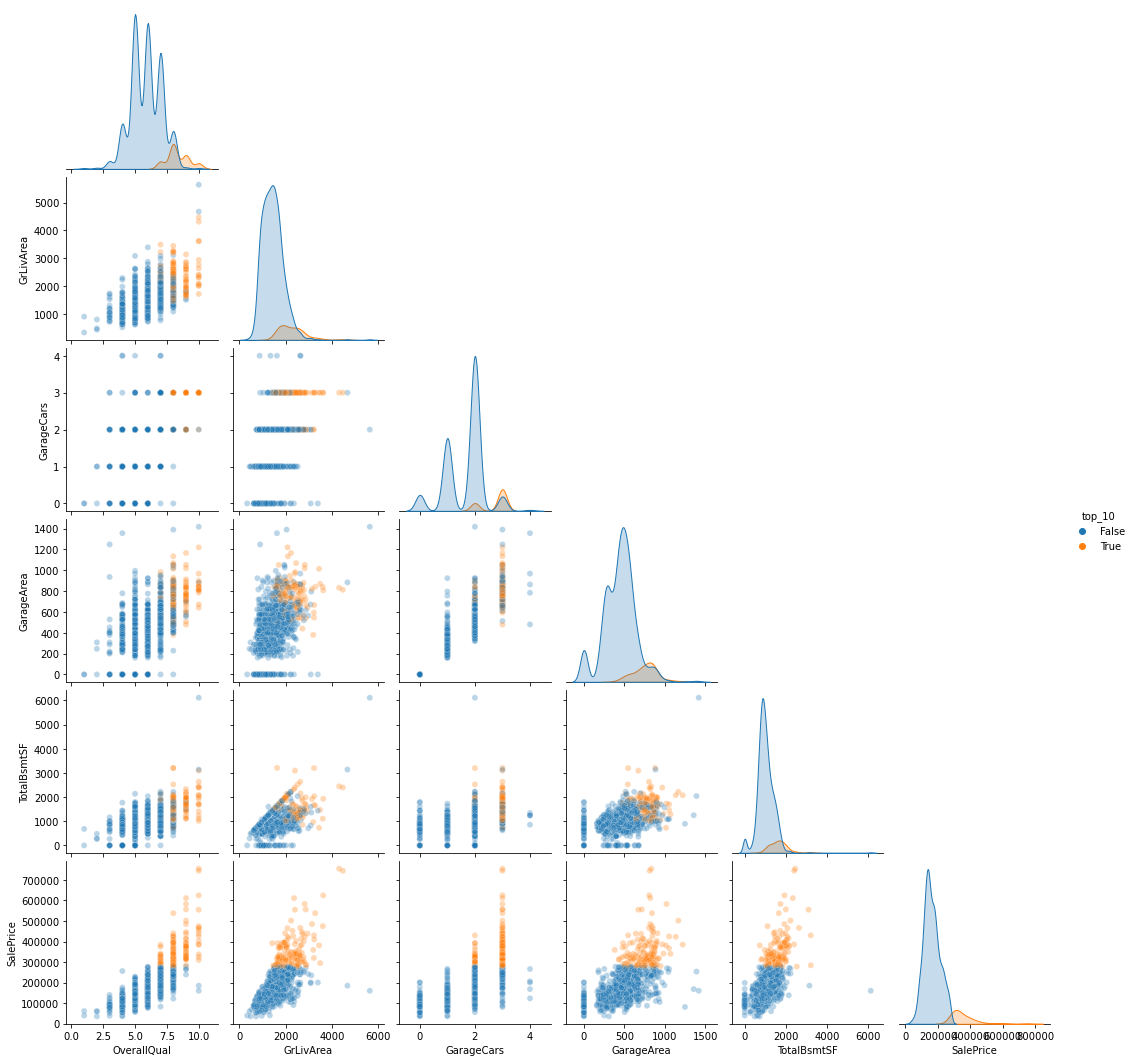

In [53]:
# Plot correlations and histograms of those columns, color with hue. This might take a while.
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(
    split_df[corr_cols + ['top_10', 'SalePrice']],
    hue='top_10',
    dropna=True,
    corner=True,
    plot_kws={'alpha': 0.3}
)

plt.show()

# Baseline - accuracy if you always predict "not top 10 %"

In [54]:
print("{:.2f}".format(
    1 - split_df.hue.mean()
))

0.90


In [55]:
# which columns have the most nulls
split_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
WoodDeckSF         0
dtype: int64

In [56]:
# drop all *cols* containing nans (non-optimal, for demo only)
model_num_cols = split_df.describe().columns.tolist()
model_df = split_df[model_num_cols].dropna(axis=1)
model_df


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,hue
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,0
2,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,0
3,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,0
4,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,0
5,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0,0
1457,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0,0
1458,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0,0


In [57]:
# confirm model cols, no target variable
X_cols = [x for x in model_df.columns.tolist() 
          if x not in ['SalePrice', 'hue', 'top_10']]
print(X_cols)
print(f'{len(X_cols)=}')


['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
len(X_cols)=33


# Linear model:
## all non-null, numeric dimensions

In [58]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from typing import Tuple

def run_logistic_regression(features: pd.DataFrame, labels: pd.Series, test_size=0.33, 
                           title='logistic regression model') -> Tuple[float,float,float,float,float,float]:
    """
    scale, split, and model data. Return model performance statistics, plot confusion matrix
    feature: dataframe of feature columns to model
    labels: series of labels to model against
    test_size: fraction of labels to use in test split
    title: title for chart
    return float of true negative, false positive, true positive, false negative, recall and precision
    """
    scaler = preprocessing.StandardScaler().fit(features)
    X = scaler.transform(features)
    y = labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    clf = LogisticRegression().fit(X_train, y_train)
    all_cols_acc = clf.score(X_test, y_test)
    ll = log_loss(y_test, clf.predict(X_test))
    cm = confusion_matrix(y_test, clf.predict(X_test))
    tn = cm[0][0]
    fp = cm[0][1]
    tp = cm[1][1]
    fn = cm[1][0]
    re = tp/(tp+fn)
    pr = tp/(tp+fp)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.heatmap(cm, annot=True, ax=ax, fmt='.0f')
    ax.set_title(f'{title}\n' \
                 'acc: {:.2f}, log loss {:.2f} ' \
                 'recall: {:.2f}, precision: {:.2f}'
                 .format(all_cols_acc, ll, re, pr)
    )
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    plt.show()
    return tn, fp, tp, fn, re, pr


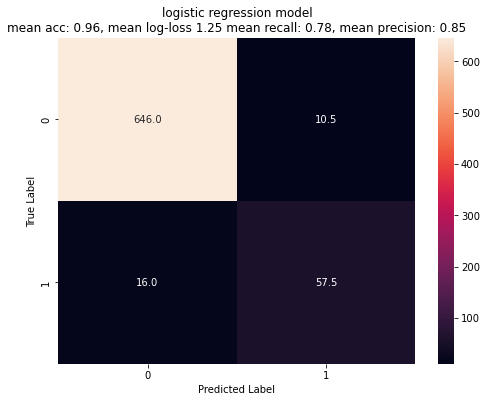

In [59]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np


def run_logistic_regression_with_kf(features: pd.DataFrame, labels: pd.Series, 
                                    n_splits=5, title='logistic regression model'
                                   ) -> Tuple[float,float,float,float]:
    """
    scale, split, and model data. Return model performance statistics, plot confusion matrix
    feature: dataframe of feature columns to model
    labels: series of labels to model against
    test_size: fraction of labels to use in test split
    title: title for chart
    return: recall mean, recall sd, precision mean, precision sd
    """
    # set up splits/folds and array for stats.
    kf = StratifiedKFold(n_splits=n_splits)
    cm_arr = np.zeros([n_splits, 2, 2])
    accs = np.zeros(n_splits)
    lls = np.zeros(n_splits)
    
    # fit model for each split/fold
    for i, (train_idx, test_idx) in enumerate(kf.split(X=features, y=labels)):
        # split data
        try:
            X_train = features.iloc[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features.iloc[test_idx]
            y_test = labels.iloc[test_idx]
        
        except AttributeError:  # ndarray doesn't have .iloc
            X_train = features[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features[test_idx]
            y_test = labels.iloc[test_idx]
            
        
        # scale all features to training features
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # fit model, evaluate
        clf = LogisticRegression().fit(X_train, y_train)
        accs[i] = clf.score(X_test, y_test)
        lls[i] = log_loss(y_test, clf.predict(X_test))
        cm = confusion_matrix(y_test, clf.predict(X_test))
        cm_arr[i] = cm
    
    # calculate mean statistics
    mean_cm = cm_arr.mean(axis=0)
    
    # get mean pr and re
    stats = defaultdict(lambda: np.zeros(n_splits))
    for i, cm_i in enumerate(cm_arr):
        tn = cm_i[0][0]
        fp = cm_i[0][1]
        tp = cm_i[1][1]
        fn = cm_i[1][0]
        stats['re'][i] = tp/(tp+fn)
        stats['pr'][i] = tp/(tp+fp)
    
    re_mean = stats['re'].mean()
    re_sd = stats['re'].std()
    pr_mean = stats['pr'].mean()
    pr_sd = stats['pr'].std()

    # plot mean confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.heatmap(mean_cm, annot=True, ax=ax, fmt='.1f')
    ax.set_title(f'{title}\n' \
                 'mean acc: {:.2f}, mean log-loss {:.2f} ' \
                 'mean recall: {:.2f}, mean precision: {:.2f}'
                 .format(accs.mean(), lls.mean(), re_mean, pr_mean)
    )
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    plt.show()
    return re_mean, re_sd, pr_mean, pr_sd


stats_all = run_logistic_regression_with_kf(features=model_df[X_cols], labels=model_df['hue'], n_splits=n_splits)

# Linear model:
## top 5 most correlated dimensions only

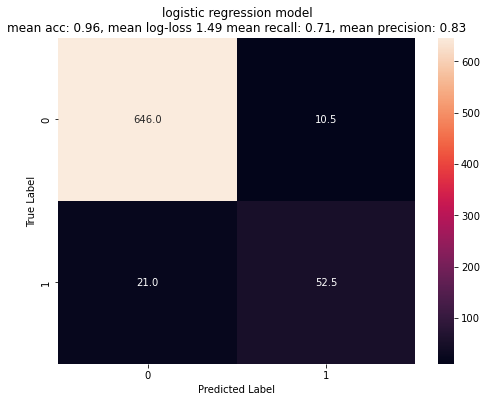

In [60]:
corr_5 = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)[1:6]
#    .drop(['GarageYrBlt'], axis=0)
#    .drop(['MasVnrArea'], axis=0)
    .index
    .tolist()
)
stats_top5 = run_logistic_regression_with_kf(features=model_df[corr_5], labels=model_df['hue'], n_splits=n_splits)



In [61]:
# Linear model:
## top 12 most correlated dimensions only

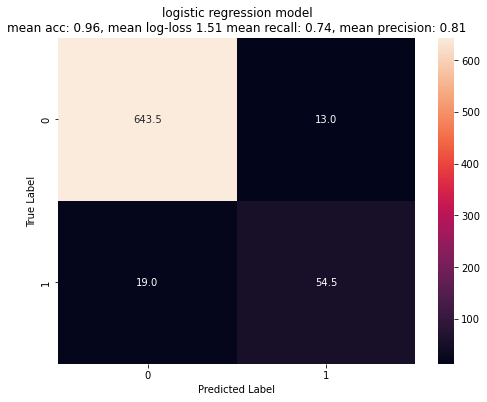

In [62]:
corr_12 = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)[1:14]
    .drop(['GarageYrBlt'], axis=0)
    .drop(['MasVnrArea'], axis=0)
    .index
    .tolist()
)
stats_top12 = run_logistic_regression_with_kf(features=model_df[corr_12], labels=model_df['hue'], n_splits=n_splits)



# Linear Model:
## 2D PCA of all columns

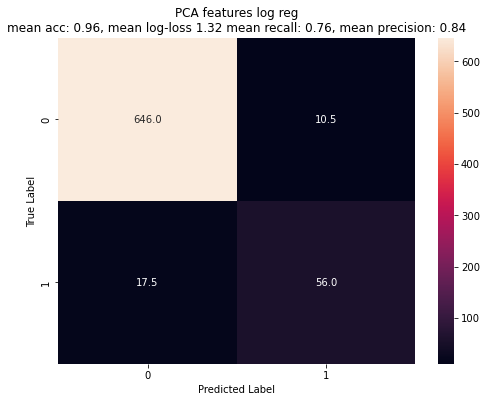

In [63]:
from sklearn.decomposition import PCA
p = PCA(n_components=33)
X_pca = p.fit_transform(model_df[X_cols])

stats_all_pca = run_logistic_regression_with_kf(features=X_pca, labels=model_df['hue'], 
                                                title='PCA features log reg', n_splits=n_splits)


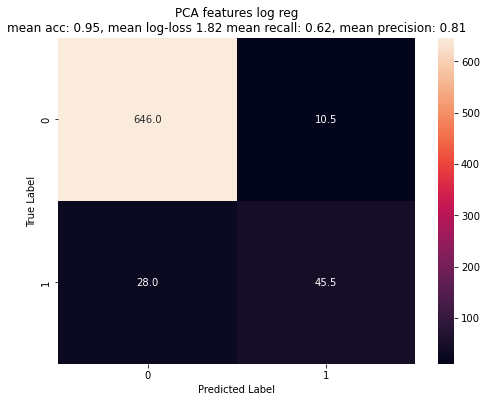

In [64]:
from sklearn.decomposition import PCA
p = PCA(n_components=12)
X_pca = p.fit_transform(model_df[X_cols])

stats_12d_pca = run_logistic_regression_with_kf(features=X_pca, labels=model_df['hue'], 
                                                title='PCA features log reg', n_splits=n_splits)


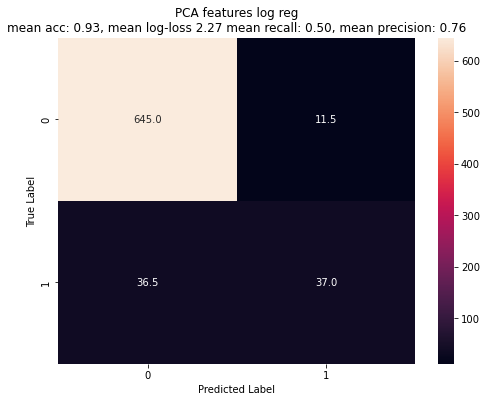

In [65]:
from sklearn.decomposition import PCA
p = PCA(n_components=5)
X_pca = p.fit_transform(model_df[X_cols])

stats_5d_pca = run_logistic_regression_with_kf(features=X_pca, labels=model_df['hue'], 
                                                title='PCA features log reg', n_splits=n_splits)


# Model Comparison

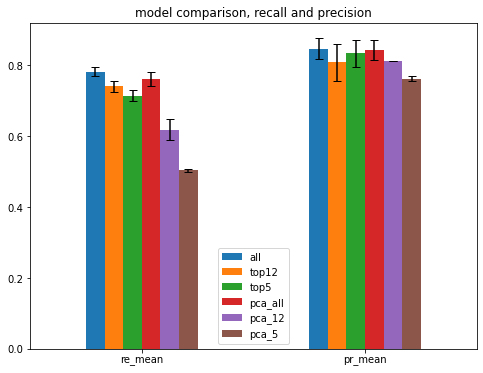

In [66]:
from typing import List
def plot_model_comparison(model_stats: List[Tuple[float, float, float, float]], names: List[str]) -> None:
    plot_df = pd.DataFrame(model_stats, 
                           columns=['re_mean', 're_sd', 'pr_mean', 'pr_sd'],
                           index=names)
    err_cols = ['re_sd', 'pr_sd']
    errs = plot_df[err_cols].rename(columns={'re_sd': 're_mean', 'pr_sd': 'pr_mean'}).T
    plot_df = plot_df.drop(err_cols, axis=1)
    plot_df.T.plot(
        kind='bar', yerr=errs, capsize=4, rot=0, figsize=(8, 6),
        title='model comparison, recall and precision')
    plt.show()
    
names = ['all', 'top12', 'top5',  'pca_all', 'pca_12', 'pca_5']
plot_model_comparison(
    model_stats=[stats_all, stats_top12, stats_top5, stats_all_pca, stats_12d_pca, stats_5d_pca],
    names=names
)

In [33]:
stats_df.T

NameError: name 'stats_df' is not defined

In [ ]:
errs

In [ ]:
from sklearn.decomposition import PCA

p = PCA(n_components=5)
X_pca = p.fit_transform(model_df[X_cols])

y_pca = model_df['hue']


In [ ]:
# create df from pca array and add in category information
X_pca_df = pd.DataFrame(X_pca)
X_pca_df['category'] = model_df['hue'].reset_index(drop=True)
X_pca_df


In [ ]:
helper_functions.plot_2d_pca(
    X_pca_df=X_pca_df,
    pc0_upper_limit=25_000
)


In [ ]:
##EXERCISE_START: What can you say about the data from this plot?


##EXERCISE_START: What can you say about the original data from this plot?

## What about a model based on that PCA result?

In [ ]:
stats_2d_pca = run_logistic_regression_with_kf(features=X_pca, labels=model_df['hue'], 
                                               title='PCA features log reg', n_splits=3)


##EXERCISE_START: Why Didn't The model based on PCA do better?
PCA based model accuracy generally lower than all variables or top 5 variables. Why?
##EXERCISE_SOLUTION:
reducing variables in classifier, introduce bias error.
##EXERCISE_END

##EXERCISE_START: Fit a PCA model with 5 PCs.
What do you think the out come will be?
##EXERCISE_SOLUTION:
upping variables in classifier, reduce bias error.
tail ends of distributions can have high predictive power - a small amount of variance can be impactful
##EXERCISE_END

# What Is Going On?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.






# reviewed

1. exlpored Ames housing dataset
2. looked for variables that would correlate with/be good predictors for housing prices
3. indicated that PCA might be a way to approach this problem


We'll go into more detail on PCA in the next episode